In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
DF = pd.read_excel('PQM dataset.xlsx', sheet_name='Active Power_1 hour')
print("DataFrame shape:", DF.shape)

DataFrame shape: (6005, 13)


In [24]:
def calc_zscore(column):
    mean = np.mean(column)
    std_dev = np.std(column)

    if std_dev == 0:
        return np.zeros_like(column)
    
    z_scores = (column - mean) / std_dev
    return z_scores

In [25]:
columns = [col for col in DF.columns if col not in ['TimeID']]

z_scores = DF[columns].apply(calc_zscore)

print(z_scores.head())

      Col_1     Col_2     Col_3     Col_4    Col_5     Col_6     Col_7  \
0 -0.974121 -1.206872 -1.095853 -0.973615 -1.20661 -1.095171 -0.969564   
1 -0.974121 -1.206872 -1.095853 -0.973616 -1.20661 -1.095170 -0.969566   
2 -0.974120 -1.206872 -1.095852 -0.973615 -1.20661 -1.095169 -0.969564   
3 -0.974120 -1.206872 -1.095853 -0.973615 -1.20661 -1.095170 -0.969564   
4 -0.974121 -1.206872 -1.095854 -0.973615 -1.20661 -1.095171 -0.969564   

      Col_8     Col_9    Col_10    Col_11    Col_12  
0 -1.208529 -1.096148 -0.969205 -1.205838 -1.093461  
1 -1.208529 -1.096148 -0.969206 -1.205838 -1.093459  
2 -1.208529 -1.096148 -0.969205 -1.205838 -1.093458  
3 -1.208529 -1.096148 -0.969205 -1.205838 -1.093460  
4 -1.208529 -1.096149 -0.969205 -1.205838 -1.093461  


In [26]:
outlier_mask = (np.abs(z_scores) > 3).any(axis=1)
print(f"Found {outlier_mask.sum()} outliers in the dataset")

cleanDF = DF[~outlier_mask]
print("Cleaned DataFrame shape:", cleanDF.shape)

Found 3 outliers in the dataset
Cleaned DataFrame shape: (6002, 13)


In [27]:
input_size = 6
power_columns = [col for col in cleanDF.columns if col != 'TimeID']

x_list = []
y_list = []

In [28]:
for i in range(len(power_columns) - input_size):
    input_window = power_columns[i:i + input_size]
    target_column = power_columns[i + input_size]

    x_list.append(cleanDF[input_window].values)
    y_list.append(cleanDF[target_column].values)

In [29]:
x = np.vstack(x_list)
y = np.hstack(y_list)

print("Input shape:", x.shape)
print("Target shape:", y.shape)

Input shape: (36012, 6)
Target shape: (36012,)


In [30]:
split_index = int(0.8 * len(x))

x_train = x[:split_index]
y_train = y[:split_index]

x_test = x[split_index:]
y_test = y[split_index:]

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (28809, 6) (28809,)
Test set shape: (7203, 6) (7203,)


In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 65396.1594
Mean Squared Error (MSE): 12103124746.5210
R-squared (R2): 1.0000


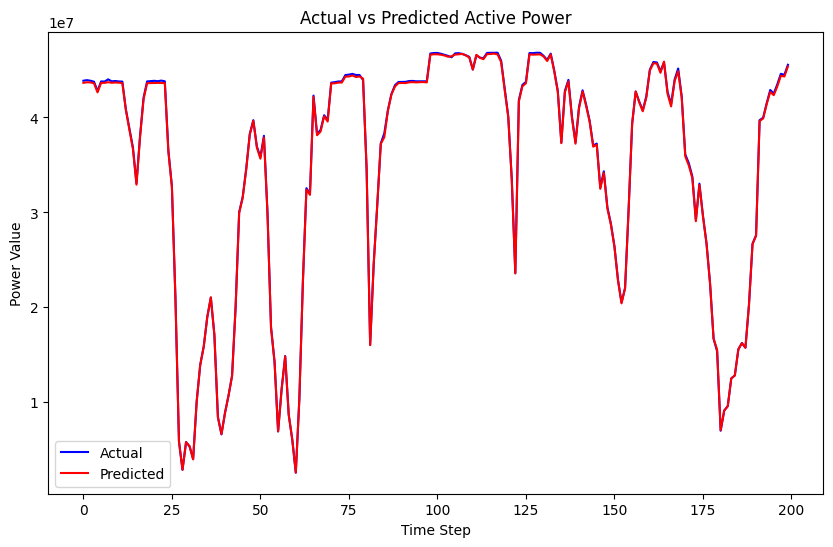

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], label='Actual', color='blue')
plt.plot(y_pred[:200], label='Predicted', color='red')
plt.title('Actual vs Predicted Active Power (first 200 values)')
plt.xlabel('Time Step')
plt.ylabel('Power Value')
plt.legend()
plt.show()

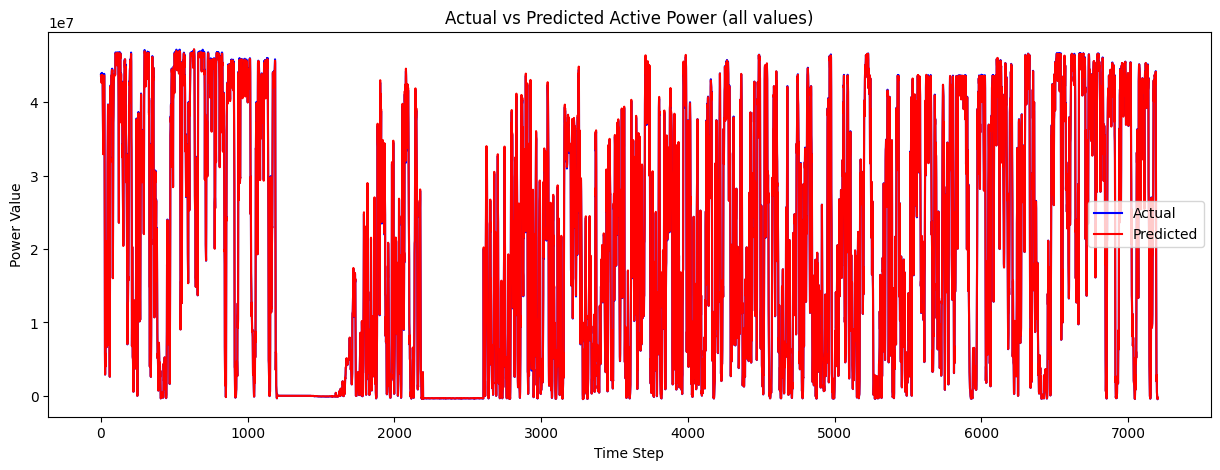

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Active Power (all values)')
plt.xlabel('Time Step')
plt.ylabel('Power Value')
plt.legend()
plt.show()